# Julia for Data Science


* **LAB**



In [17]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("CSV")
Pkg.add("GLM")
Pkg.add("Plots")

 Resolving package versions...
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\mhamed\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [18]:
using Statistics
using DataFrames
using CSV
using GLM
using Plots
PyPlot()

UndefVarError: UndefVarError: PyPlot not defined

### Example 1: Kmeans Clustering

Let's start with some data.

The Sacramento real estate transactions file that we download next is a list of 985 real estate transactions in the Sacramento area reported over a five-day period,

In [19]:
download("http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv","houses.csv")
houses = CSV.File("houses.csv") |> DataFrame

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
,String⍰,String⍰,Int64⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,Int64⍰,Float64⍰,Float64⍰
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271


Let's use `Plots` to plot with the `pyplot` backend.

Now let's create a scatter plot to show the price of a house vs. its square footage,

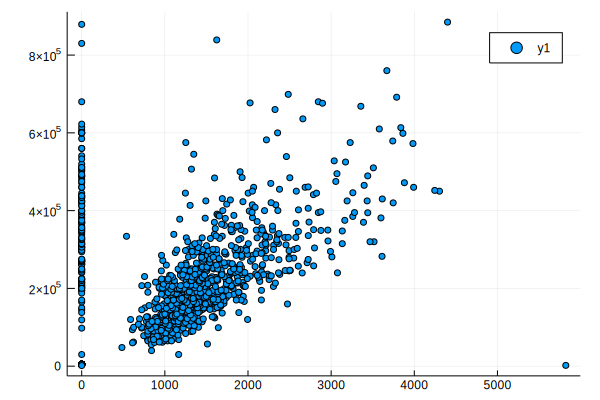

In [20]:
x = houses[:sq__ft]
y = houses[:price]
scatter(x,y,markersize=3)

*Houses with 0 square feet that cost money?*

The square footage seems to not have been recorded in these cases. 

Filtering these houses out is easy to do!

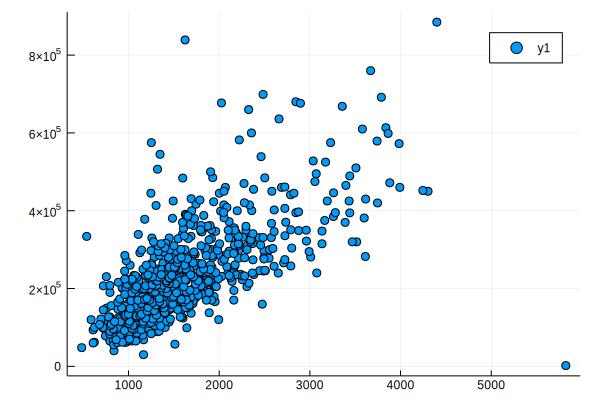

In [21]:
filter_houses = houses[houses[:sq__ft].>0,:]
x = filter_houses[:sq__ft]
y = filter_houses[:price]
scatter(x,y)

This makes sense! The higher the square footage, the higher the price.

We can filter a `DataFrame` by feature value too, using the `by` function.

In [22]:
by(filter_houses,:type,size)

,type,x1
,String⍰,Tuple…
1,Residential,"(759, 12)"
2,Condo,"(42, 12)"
3,Multi-Family,"(13, 12)"


In [23]:
by(filter_houses,:type,filter_houses->mean(filter_houses[:price]))

,type,x1
,String⍰,Float64
1,Residential,2.34802e5
2,Condo,1.34213e5
3,Multi-Family,2.24535e5


Now let's do some kmeans clustering on this data.

First, we can load the `Clustering` package to do this.

In [24]:
using GLM

Let's store the features `:latitude` and `:longitude` in an array `X` that we will pass to `kmeans`.

First we add data for `:latitude` and `:longitude` to a new `DataFrame` called `X`.

In [26]:
X = filter_houses[[:sq__ft,:beds]];

In [41]:
model = lm(@formula(price ~ sq__ft + latitude + longitude), filter_houses)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: price ~ 1 + sq__ft + latitude + longitude

Coefficients:
              Estimate Std.Error t value Pr(>|t|)
(Intercept)  1.68857e7 3.66502e6 4.60725    <1e-5
sq__ft         122.641   4.49227 27.3003   <1e-99
latitude       69502.5   24914.7 2.78962   0.0054
longitude    1.60923e5   26387.4 6.09846    <1e-8


In [47]:
predict(model)

UndefVarError: UndefVarError: accuracy not defined